# Micro-Credit Defaulter Model

# Problem statement

  A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on.
  
  Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
    

# Data Description

###### Variable - Definition	
- **label** - indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}	

- **msisdn** -	mobile number of user	

- **aon** - 	age on cellular network in days	

- **daily_decr30** -	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)	

- **daily_decr90** -	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)	

- **rental30** -	Average main account balance over last 30 days	

- **rental90** -	Average main account balance over last 90 days

- **last_rech_date_ma** -	Number of days till last recharge of main account	

- **last_rech_date_da** -	Number of days till last recharge of data account	

- **last_rech_amt_ma** -	Amount of last recharge of main account (in Indonesian Rupiah)

- **cnt_ma_rech30** -	Number of times main account got recharged in last 30 days	

- **fr_ma_rech30** -	Frequency of main account recharged in last 30 days	

- **sumamnt_ma_rech30** -	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)	

- **medianamnt_ma_rech30** -	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)	

- **medianmarechprebal30** -	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)	

- **cnt_ma_rech90** -	Number of times main account got recharged in last 90 days	

- **fr_ma_rech90** -	Frequency of main account recharged in last 90 days	

- **sumamnt_ma_rech90** -	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)	

- **medianamnt_ma_rech90** -	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)	

- **medianmarechprebal90** -	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

- **cnt_da_rech30** -	Number of times data account got recharged in last 30 days	

- **fr_da_rech30** -	Frequency of data account recharged in last 30 days	

- **cnt_da_rech90** -	Number of times data account got recharged in last 90 days	

- **fr_da_rech90** -	Frequency of data account recharged in last 90 days

- **cnt_loans30** -	Number of loans taken by user in last 30 days

- **amnt_loans30** -	Total amount of loans taken by user in last 30 days

- **maxamnt_loans30**  -	maximum amount of loan taken by the user in last 30 days	There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively

- **medianamnt_loans30**   -	Median of amounts of loan taken by the user in last 30 days	

- **cnt_loans90** - Number of loans taken by user in last 90 days	

- **amnt_loans90** -	Total amount of loans taken by user in last 90 days	

- **maxamnt_loans90**	 - maximum amount of loan taken by the user in last 90 days	

- **medianamnt_loans90**   -	Median of amounts of loan taken by the user in last 90 days	

- **payback30** -	Average payback time in days over last 30 days	

- **payback90** -	Average payback time in days over last 90 days

- **pcircle** -	telecom circle	

- **pdate** -	date	


# Objective

   Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the data
df=pd.read_csv("micro_credit.csv")
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


# Basic Statistics

In [3]:
#basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [4]:
#column names
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
#no.of.rows and columns
df.shape

(209593, 37)

In [6]:
#data types of the attribiutes
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [7]:
# Finding Missing Values
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

<AxesSubplot:>

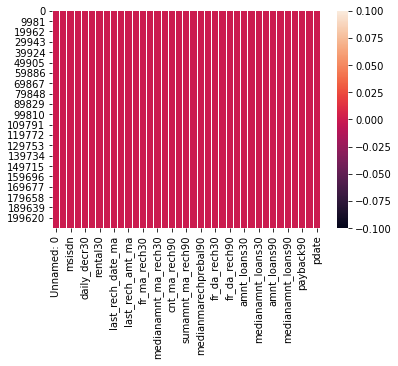

In [8]:
#Graphical Visuvalization of Missing values
sns.heatmap(df.isnull())

In [9]:
#printing the object data type columns and their unique values
for column in df.columns:
    if df[column].dtypes==object:
        print(str(column)+":"+str(df[column].unique()))
        print(df[column].value_counts())
        print("**"*10)
        print("\n")

msisdn:['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
47819I90840    7
04581I85330    7
30080I90588    6
55809I89238    6
43096I88688    6
              ..
76973I70784    1
76769I82734    1
05351I82731    1
68602I91190    1
12966I70377    1
Name: msisdn, Length: 186243, dtype: int64
********************


pcircle:['UPW']
UPW    209593
Name: pcircle, dtype: int64
********************


pdate:['2016-07-20' '2016-08-10' '2016-08-19' '2016-06-06' '2016-06-22'
 '2016-07-02' '2016-07-05' '2016-08-05' '2016-06-15' '2016-06-08'
 '2016-06-12' '2016-06-20' '2016-06-29' '2016-06-16' '2016-08-03'
 '2016-06-24' '2016-07-04' '2016-07-03' '2016-07-01' '2016-08-08'
 '2016-06-26' '2016-06-23' '2016-07-06' '2016-07-09' '2016-06-10'
 '2016-06-07' '2016-06-27' '2016-08-11' '2016-06-30' '2016-06-19'
 '2016-07-26' '2016-08-14' '2016-06-14' '2016-06-21' '2016-06-25'
 '2016-06-28' '2016-06-11' '2016-07-27' '2016-07-23' '2016-08-16'
 '2016-08-15' '2016-06-02' '2016-0

###### Observation
- **column "msisdn"**- mobile number of user - this column is not going to be useful in anyway during our prediction.so dropping is recommended 
 
- **column "pcircle"** - telecom circle - we can observe that the every user uses only one telecom service "UPW". since there is no classifier value in this column dropping it is recommended
 
- **column "pdate"** - date - this column is not going to be useful in anyway during our prediction.so dropping is recommended  
- **column "maxamnt_loans30"** - maximum amount of loan taken by the user in last 30 days- In this column there should be only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively . But the **nunique()** shows there are **1050** which clearly shows there are many mistyped values 

In [10]:
#printing the int and float data type columns and their unique values
for column in df.columns:
    if df[column].dtypes==int or float:
        print(str(column)+":"+str(df[column].unique()))
        print(df[column].value_counts())
        print("**"*10)
        print("\n")

Unnamed: 0:[     1      2      3 ... 209591 209592 209593]
2049      1
23969     1
126359    1
103832    1
105881    1
         ..
57929     1
64074     1
62027     1
51788     1
2047      1
Name: Unnamed: 0, Length: 209593, dtype: int64
********************


label:[0 1]
1    183431
0     26162
Name: label, dtype: int64
********************


msisdn:['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
47819I90840    7
04581I85330    7
30080I90588    6
55809I89238    6
43096I88688    6
              ..
76973I70784    1
76769I82734    1
05351I82731    1
68602I91190    1
12966I70377    1
Name: msisdn, Length: 186243, dtype: int64
********************


aon:[2.72000000e+02 7.12000000e+02 5.35000000e+02 ... 8.03380622e+05
 5.81435484e+05 8.11881373e+05]
95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
818222.402828      1
603666.669107      1
852238.900959      1
851325.512514

###### Key Observation
   - from observing all the columns we find that the column "Unnamed: 0" unrealted. so droping the column is recommended
        

In [3]:
#Dropping columns which are not going to help much on prediction
df.drop(columns=["Unnamed: 0","pdate","pcircle","msisdn"],inplace=True)

In [12]:
df.shape

(209593, 33)

# EDA

### Univariate Analysis - Categorical Feautures
Now let's find the Unique values of all the categorical features we have , starting with the targeted variable.

In [13]:
#Attribute "Label"
df.groupby('label').size()

label
0     26162
1    183431
dtype: int64

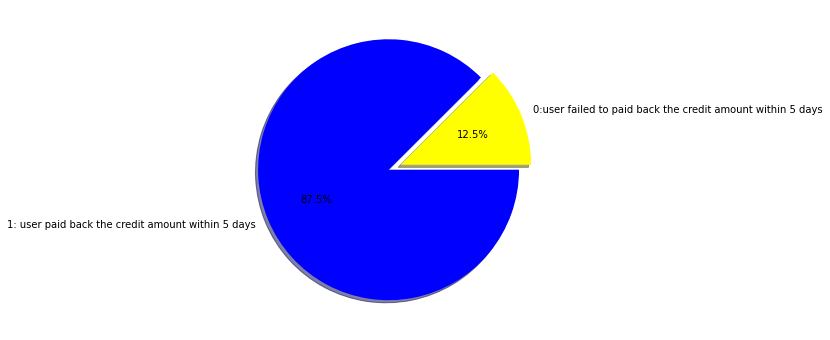

In [14]:
#Visuvalization
plt.figure(figsize=(8,6))
sizes = [26162,183431]
labels = ['0:user failed to paid back the credit amount within 5 days','1: user paid back the credit amount within 5 days']
colors = ['yellow', 'blue']
explode = [0.1,0]
plt.pie(sizes,labels= labels,colors= colors,explode = explode, autopct = '%1.1f%%',shadow = True)
plt.show()


###### Plot Insight

- Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
    
*The above plot shows* 
    
- that the number of users who pay back the credit within 5 days i.e [1] is around 80%
    
- that the number of users who failed to pay back the credit within 5 days i.e [0] is around 20%


In [15]:
#Attribute "maxamnt_loans90"
df.groupby('maxamnt_loans90').size()

maxamnt_loans90
0       2043
6     180945
12     26605
dtype: int64

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='count'>

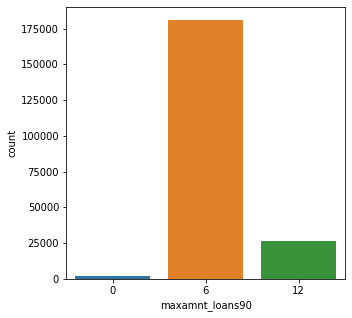

In [16]:
#Visualization
plt.figure(figsize=(5,5))
sns.countplot(df["maxamnt_loans90"])

###### Plot Insight

"maxamnt_loans90"- maximum amount of loan taken by the user in last 90 days

    i)users who took loan of **5** Indonesian Rupiah is more( around 175000 users)
    
    ii)users who took loan of **10** Indonesian Rupiah is less compared to users who took **5** Indonesian Rupiah( around 175000 users)

    iii)users who didnt took any loan were very low


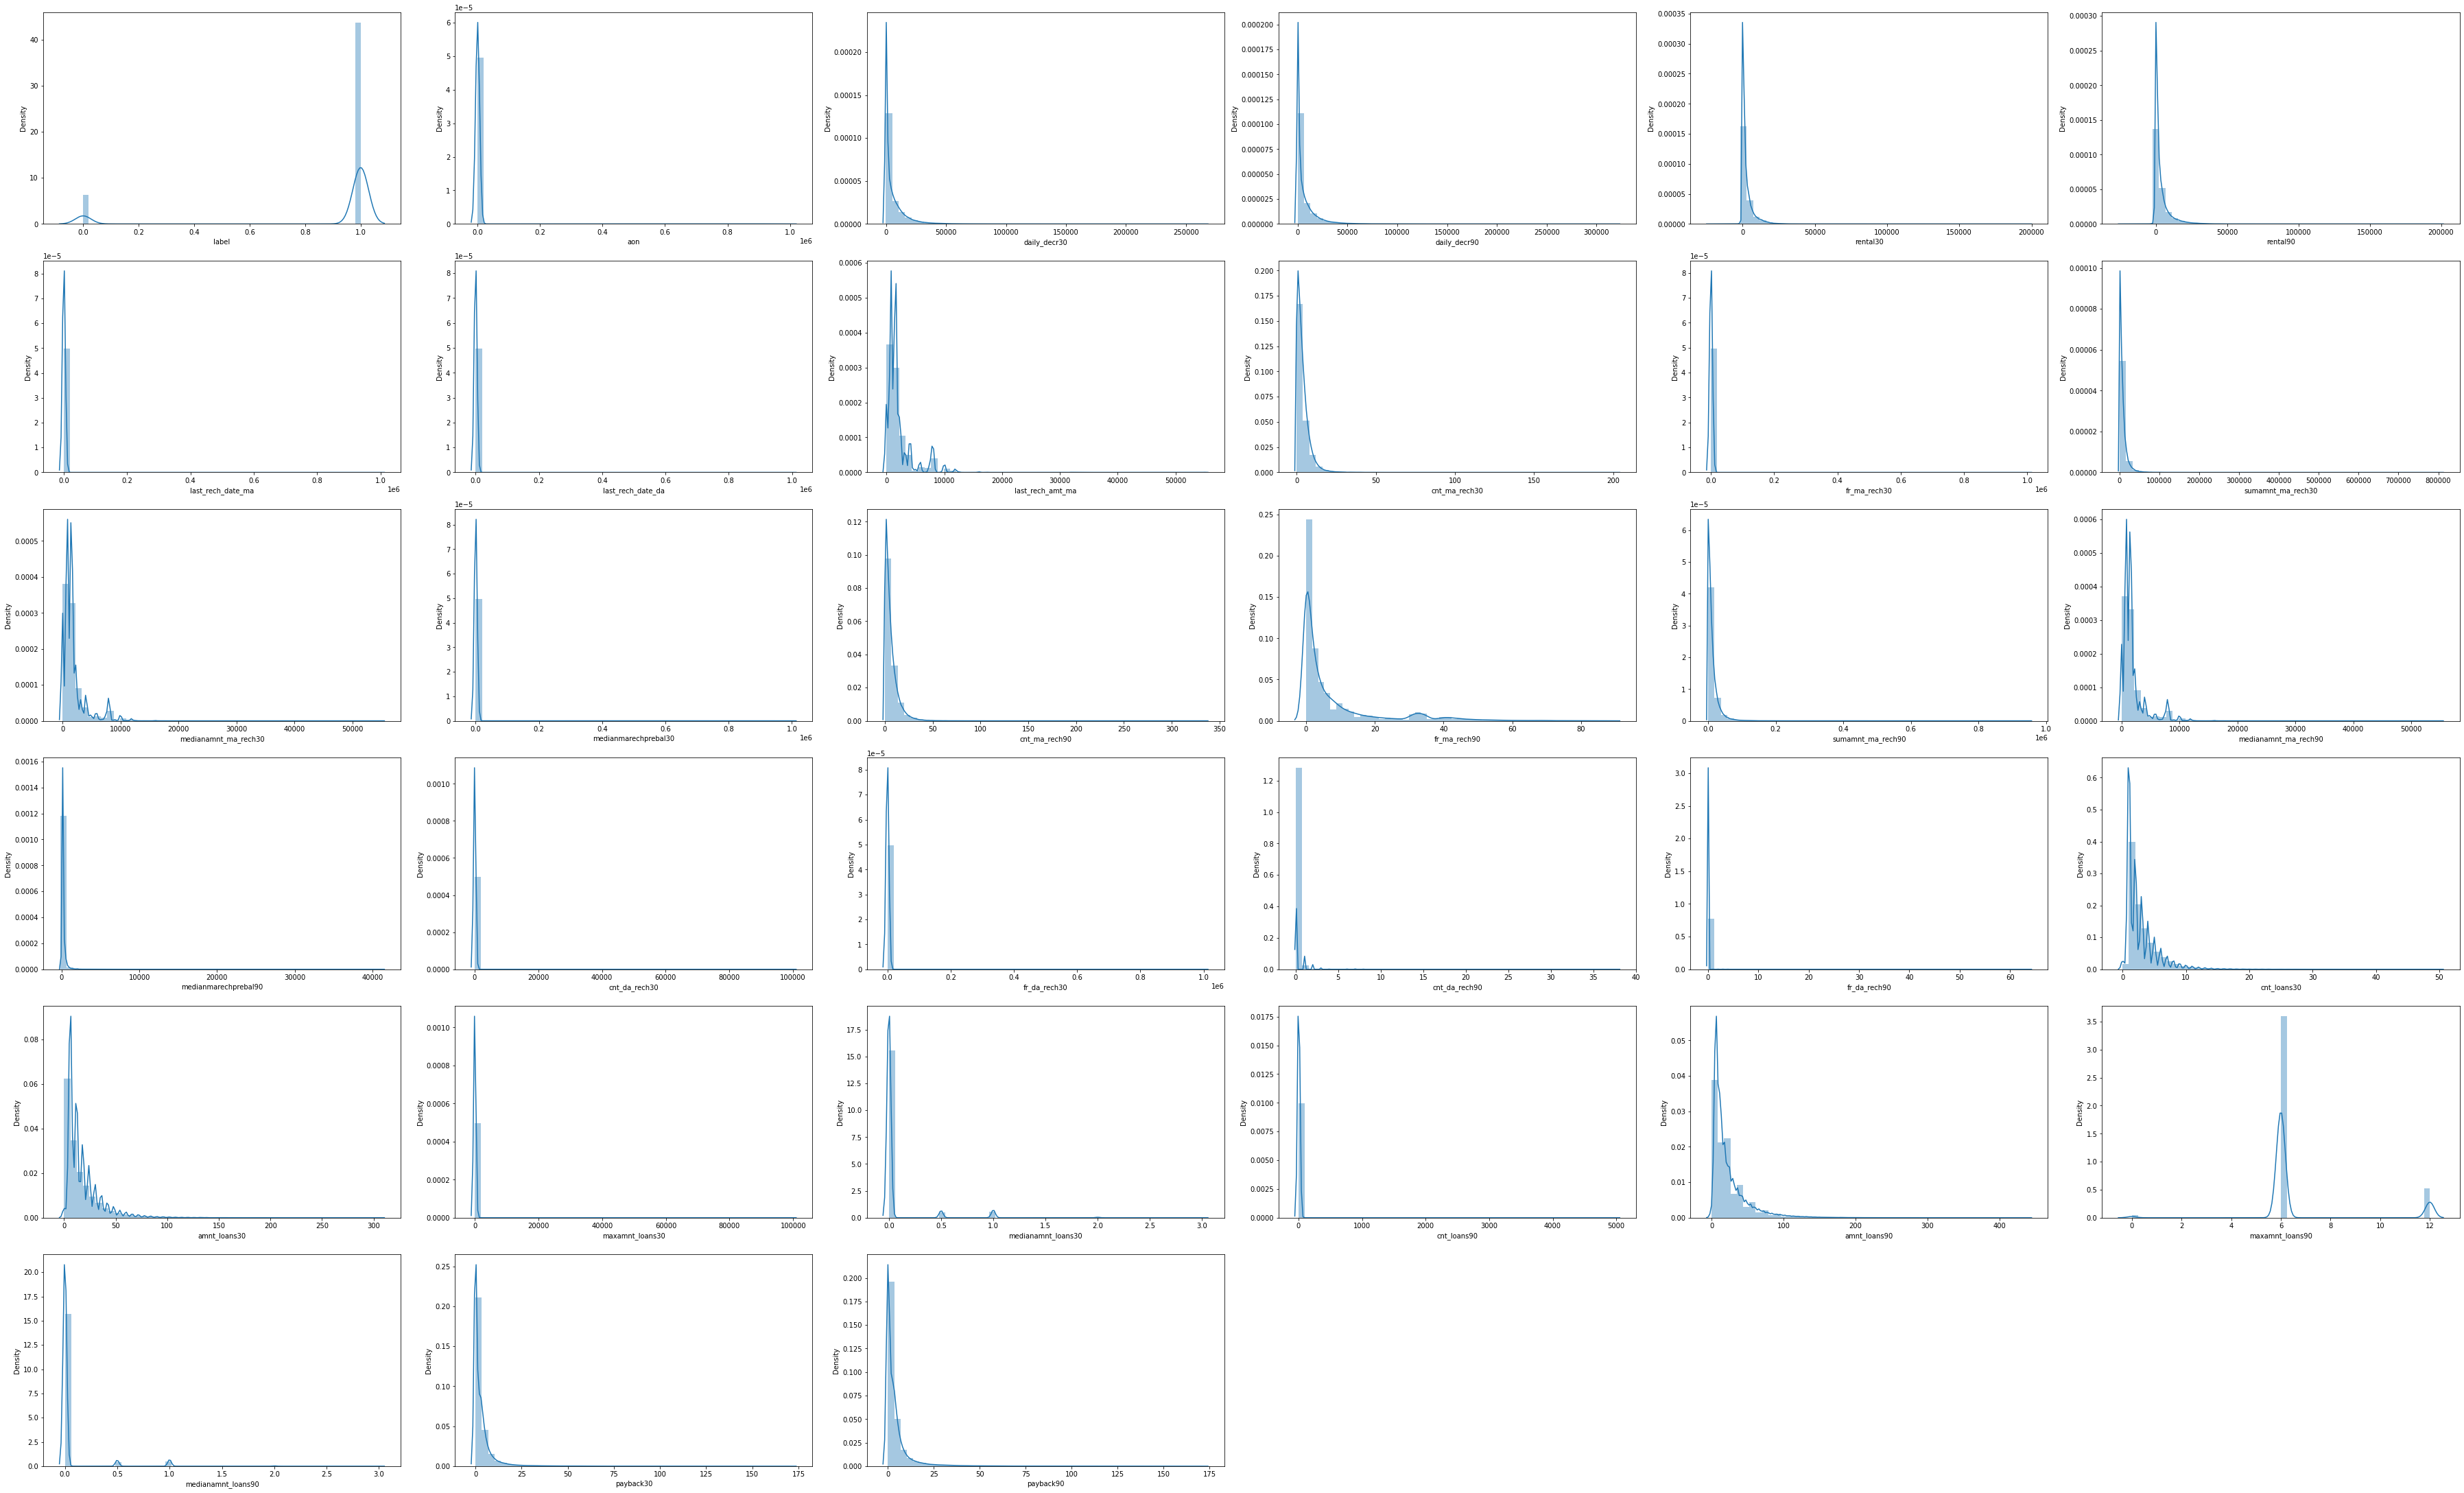

In [17]:
#Displacement analysis
collist=df.columns.values
ncol=6
nrow=10
plt.figure(figsize=(50,50))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df[collist[i]])
    plt.tight_layout()

## Displacement plot Insight

from the displacement graph we infer that 

all the columns  shows Right Skewed Distribution. 

Hence all the attributes were **Positively skewed**

# Bivariate Analysis

In [18]:
#Relationship between Our target variables with other variables
df.groupby('label').sum()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,,,,,,,,,,,,,,,,,,,,,
0,2.320831e+08,3.328792e+07,3.345643e+07,5.310663e+07,6.094402e+07,8.433829e+07,9.079211e+07,32363593,34100,9.283352e+07,...,37446,232152,7.112761e+06,740.0,4.108362e+05,252264,163104,708.5,59408.060175,77937.837748
1,1.468207e+09,1.094616e+09,1.241396e+09,5.112397e+08,6.691536e+08,7.028611e+08,6.872596e+08,400331262,799673,6.904900e+08,...,540817,3530466,5.045379e+07,10584.0,3.471019e+06,4703646,1241826,8949.0,652962.169939,827815.215169


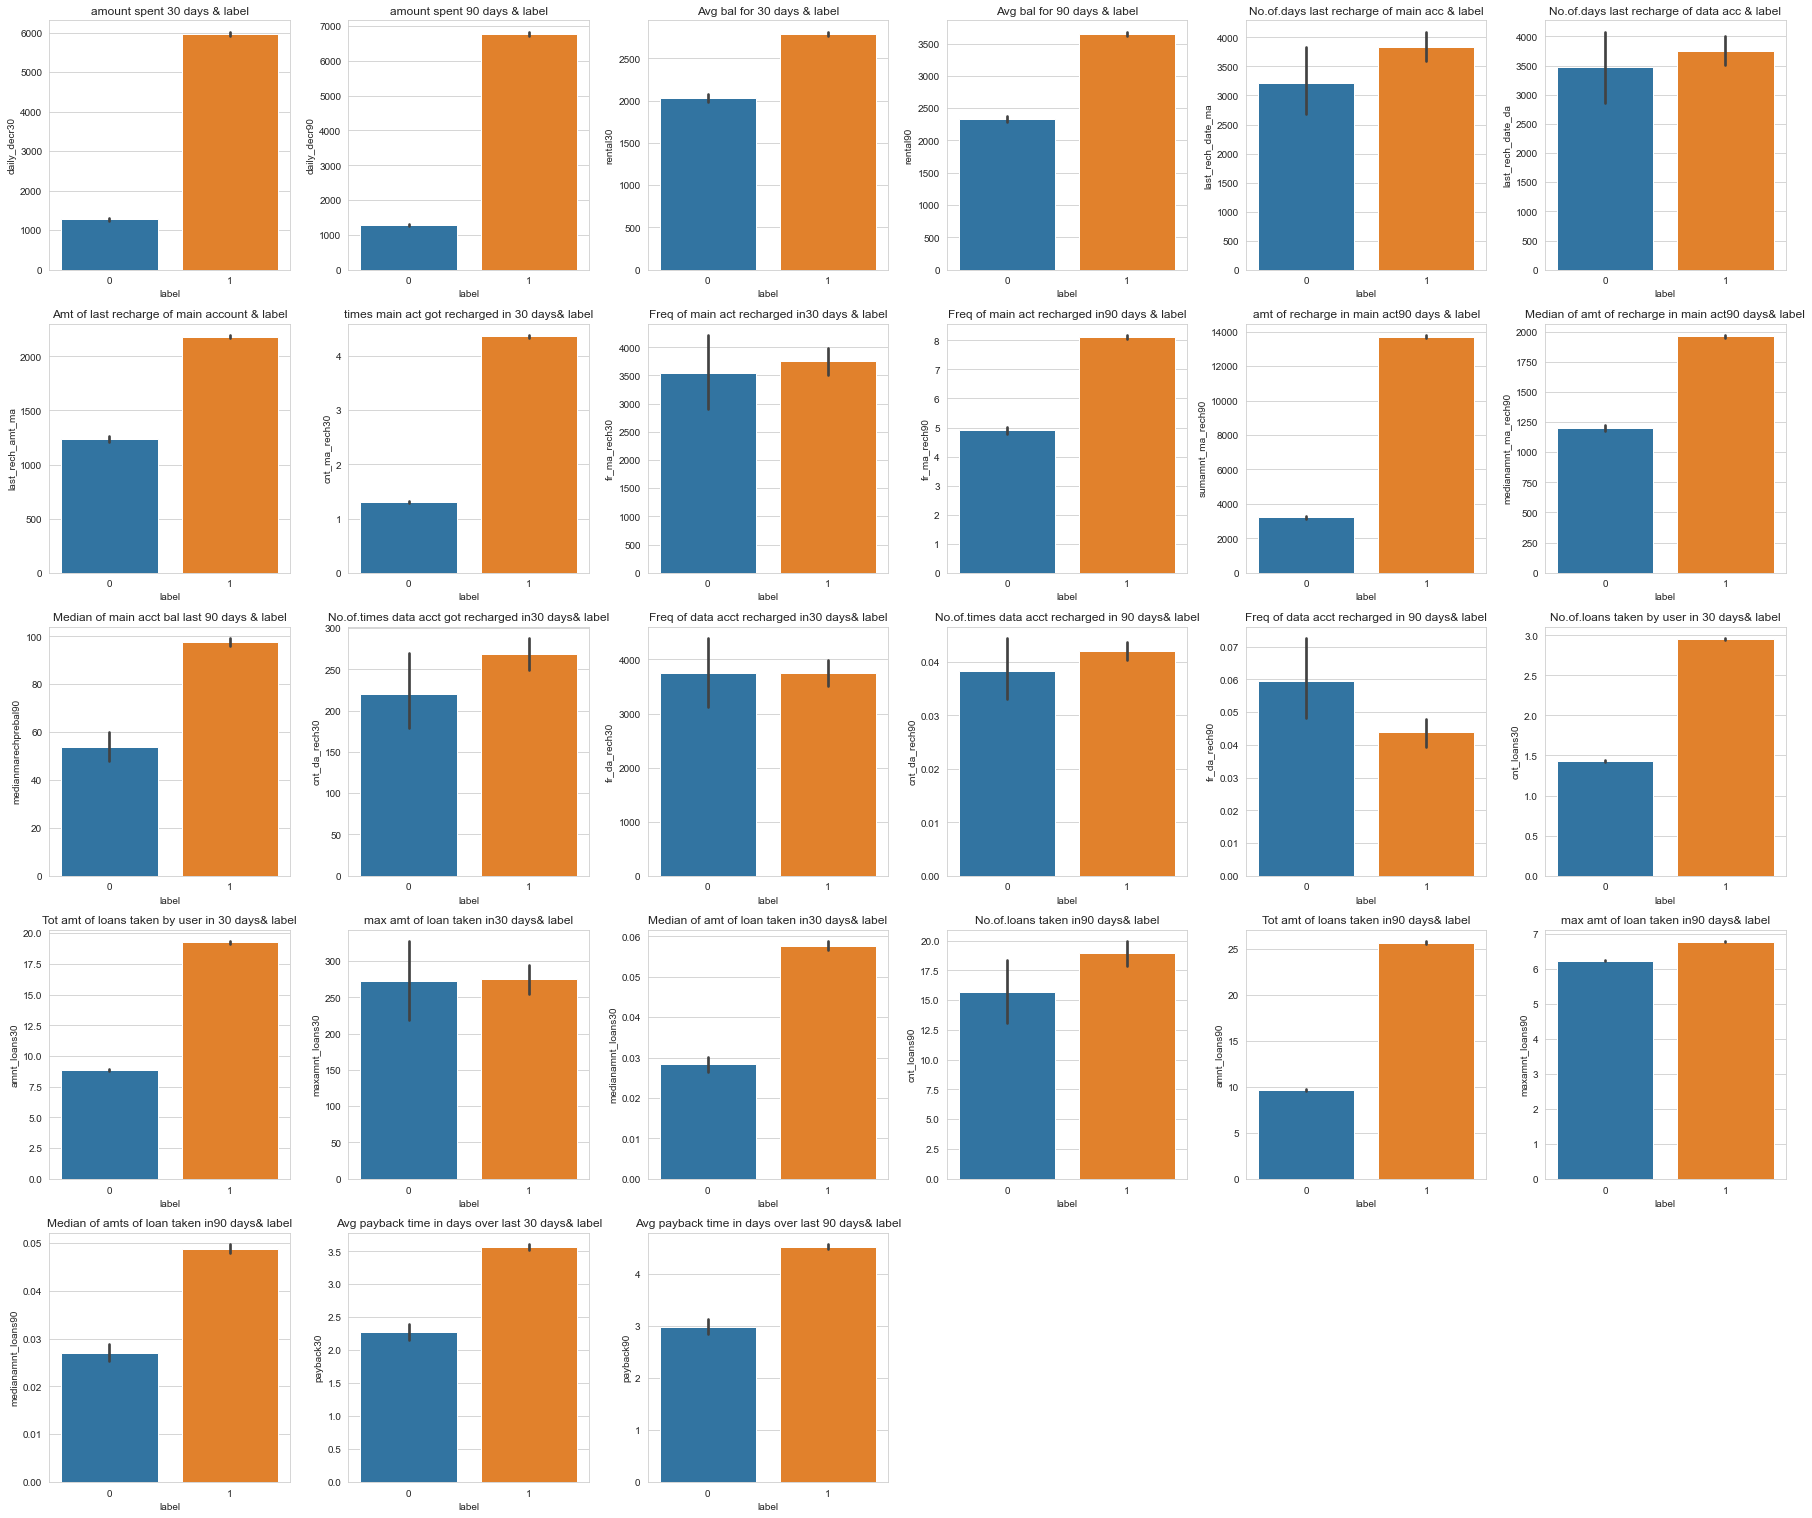

In [19]:
#Relationship between Our target variables with other variables
#Visualization
plt.figure(figsize=(25,25))
sns.set_style("whitegrid")
plt.subplot(6,6,1)
sns.barplot(x="label",y="daily_decr30",data=df).set_title("amount spent 30 days & label")
plt.subplot(6,6,2)
sns.set_style("whitegrid")
sns.barplot(x="label",y="daily_decr90",data=df).set_title("amount spent 90 days & label")
plt.subplot(6,6,3)
sns.set_style("whitegrid")
sns.barplot(x="label",y="rental30",data=df).set_title("Avg bal for 30 days & label")
plt.subplot(6,6,4)
sns.set_style("whitegrid")
sns.barplot(x="label",y="rental90",data=df).set_title("Avg bal for 90 days & label")
plt.subplot(6,6,5)
sns.set_style("whitegrid")
sns.barplot(x="label",y="last_rech_date_ma",data=df).set_title("No.of.days last recharge of main acc & label")
plt.subplot(6,6,6)
sns.set_style("whitegrid")
sns.barplot(x="label",y="last_rech_date_da",data=df).set_title("No.of.days last recharge of data acc & label")
plt.subplot(6,6,7)
sns.set_style("whitegrid")
sns.barplot(x="label",y="last_rech_amt_ma",data=df).set_title("Amt of last recharge of main account & label")
plt.subplot(6,6,8)
sns.set_style("whitegrid")
sns.barplot(x="label",y="cnt_ma_rech30",data=df).set_title("times main act got recharged in 30 days& label")
plt.subplot(6,6,9)
sns.set_style("whitegrid")
sns.barplot(x="label",y="fr_ma_rech30",data=df).set_title("Freq of main act recharged in30 days & label")
plt.subplot(6,6,10)
sns.set_style("whitegrid")
sns.barplot(x="label",y="fr_ma_rech90",data=df).set_title("Freq of main act recharged in90 days & label")
plt.subplot(6,6,11)
sns.set_style("whitegrid")
sns.barplot(x="label",y="sumamnt_ma_rech90",data=df).set_title("amt of recharge in main act90 days & label")
plt.subplot(6,6,12)
sns.set_style("whitegrid")
sns.barplot(x="label",y="medianamnt_ma_rech90",data=df).set_title("Median of amt of recharge in main act90 days& label")
plt.subplot(6,6,13)
sns.set_style("whitegrid")
sns.barplot(x="label",y="medianmarechprebal90",data=df).set_title("Median of main acct bal last 90 days & label")
plt.subplot(6,6,14)
sns.set_style("whitegrid")
sns.barplot(x="label",y="cnt_da_rech30",data=df).set_title("No.of.times data acct got recharged in30 days& label")
plt.subplot(6,6,15)
sns.set_style("whitegrid")
sns.barplot(x="label",y="fr_da_rech30",data=df).set_title("Freq of data acct recharged in30 days& label")
plt.subplot(6,6,16)
sns.set_style("whitegrid")
sns.barplot(x="label",y="cnt_da_rech90",data=df).set_title("No.of.times data acct recharged in 90 days& label")
plt.subplot(6,6,17)
sns.set_style("whitegrid")
sns.barplot(x="label",y="fr_da_rech90",data=df).set_title("Freq of data acct recharged in 90 days& label")
plt.subplot(6,6,18)
sns.set_style("whitegrid")
sns.barplot(x="label",y="cnt_loans30",data=df).set_title("No.of.loans taken by user in 30 days& label")
plt.subplot(6,6,19)
sns.set_style("whitegrid")
sns.barplot(x="label",y="amnt_loans30",data=df).set_title("Tot amt of loans taken by user in 30 days& label")
plt.subplot(6,6,20)
sns.set_style("whitegrid")
sns.barplot(x="label",y="maxamnt_loans30",data=df).set_title("max amt of loan taken in30 days& label")
plt.subplot(6,6,21)
sns.set_style("whitegrid")
sns.barplot(x="label",y="medianamnt_loans30",data=df).set_title("Median of amt of loan taken in30 days& label")
plt.subplot(6,6,22)
sns.set_style("whitegrid")
sns.barplot(x="label",y="cnt_loans90",data=df).set_title("No.of.loans taken in90 days& label")
plt.subplot(6,6,23)
sns.set_style("whitegrid")
sns.barplot(x="label",y="amnt_loans90",data=df).set_title("Tot amt of loans taken in90 days& label")
plt.subplot(6,6,24)
sns.set_style("whitegrid")
sns.barplot(x="label",y="maxamnt_loans90",data=df).set_title("max amt of loan taken in90 days& label")
plt.subplot(6,6,25)
sns.set_style("whitegrid")
sns.barplot(x="label",y="medianamnt_loans90",data=df).set_title("Median of amts of loan taken in90 days& label")
plt.subplot(6,6,26)
sns.set_style("whitegrid")
sns.barplot(x="label",y="payback30",data=df).set_title("Avg payback time in days over last 30 days& label")
plt.subplot(6,6,27)
sns.set_style("whitegrid")
sns.barplot(x="label",y="payback90",data=df).set_title("Avg payback time in days over last 90 days& label")
plt.tight_layout()





### Plot Insight:
- **label vs daily_decr30** - user who paid back the credit amount ,spend more amount to recharge their main account for a month in total when compared with the user who failed to pay back the loan amount

- **label vs daily_decr90** - user who paid back the credit amount ,spend more amount to recharge their main account for a three months in total when compared with the user who failed to pay back the loan amount

- **label vs rental30** - user who paid back the credit amount used to keep more balance in their main account(avg around 3700) for a  months  when compared with the user who failed to pay back the loan amount(avg around 2000)

- **label vs rental90** - user who paid back the credit amount used to keep more balance in their main account(avg around 3600) for 3 months  when compared with the user who failed to pay back the loan amount(avg around 2250)

- **label vs last_rech_date_ma** -user who repay the loan used to recharge their mobile main account balance often(in total 3750) 

- **label vs last_rech_date_da** -user who repay the loan used to recharge their mobile data account balance(in total 3750)
and user who repay the loan used to recharge their mobile data account balance(in total 3750) 

- **label vs last_rech_amt_ma** - there is no much difference b/w the user who repay the loan and the user who failed to pay with respect to their recharge on their mobile data account balance

- **label vs cnt_ma_rech30** - user who repay their loan used to recharge main account atleast 4 times an average in a month whereas the user who failed to repay their the loan ,recharge 1.1 times an average in a month

- **label vs fr_ma_rech30** - The frequency of main account recharged main account for a month who repay their loan is around 3750 in approx whereas the frequency of main account recharged main account for a month who failed to repay their loan is around 3500 in approx

- **label vs fr_ma_rech90** - The frequency of main account recharged for 90 who repay their loan is around 8 in approx whereas the frequency of main account recharged for a month who failed to repay their loan is around 4.9 in approx

- **label vs sumamnt_ma_rech90** - Total amount of recharge in main account for 3 month by users who repay the loan amount amount is around 14,000(approx) and Total amount of recharge in main account for 3 month by users who failed to repay the loan amount amount is around 3,000(approx)

- **label vs medianamnt_ma_rech90** - median of amount of recharge for 90 days by users who repay the loan amount amount is around 1900(approx) and median of amount of recharge for 90 days by users who failed to repay the loan amount amount is around 1200(approx)

- **label vs medianmarechprebal90** - median of recharge in main account for 90 days by users who repay the loan amount amount is around 90(approx) and median of recharge in main account for 90 days by users who failed to repay the loan amount amount is around 55(approx)

- **label vs cnt_da_rech30** - user who repay their loan used to recharge data account atleast 280 times an average in a month whereas the user who failed to repay their the loan ,recharge 220 times an average in a month

- **label vs fr_da_rech30** - The frequency of data account recharged for 30 days is around 3800 in appox by both the users
who paid and failed to repay their loan

- **label vs cnt_da_rech90** - user who repay their loan used to recharge data account atleast 0.04 times an average in 3 month whereas the user who failed to repay their the loan ,recharge 0.03 times an average in 3 month

- **label vs fr_da_rech90** - The frequency of data account recharged for 90 days is around 0.04 in appox by the users
who repay their loan and The frequency of data account recharged for 90 days is around 0.06 in appox by the users
who failed repay their loan

- **label vs cnt_loans30** - no.of loans taken by the user who repay is 3 in average whereas no.of loans taken by the user who failed to repay is 1.4 in average in one month

- **label vs amnt_loans30** - total amount of loans taken by users who repay it is 19 indonesian rupee in average whereas total amount of loans taken by users who failed to repay it is 8.7 indonesian rupee in average in a month

- **label vs maxamnt_loans30** - The maximum amount of loan taken by both the defaulter and the non-defaulter where almost equal i.e 270(approx) for a period of 1 month

- **label vs medianamnt_loans30** - the median of amount of loan taken by the defaulter is around 0.03 whereas the median of amount of loan taken by the user who repaid their loan amount is around 0.06 for a period of 1 month

- **label vs cnt_loans90** - no.of loans taken by the user who repay is 18.5 in average whereas no.of loans taken by the user who failed to repay is 15.5 in average for a period of 3 month

- **label vs amnt_loans90** - total amount of loans taken by users who repay it is 25 indonesian rupee in average whereas total amount of loans taken by users who failed to repay it is 10 indonesian rupee in average for a period of 3 month

- **label vs maxamnt_loans90** - The maximum amount of loan taken by the defaulter is 6.8 and the non-defaulter is 6.2 for a period of 3 month

- **label vs medianamnt_loans90** - the median of amount of loan taken by the defaulter is around 0.05 whereas the median of amount of loan taken by the user who repaid their loan amount is around 0.03 for a period of 3 month

- **label vs payback30** - the defaulter takes 23 time to pay back the loan as an average whereas the non-defaulter takes 36 times to repay  the loan in a period of one month

- **label vs  payback90** - the defaulter takes 3 time to pay back the loan as an average whereas the non-defaulter takes 4.5 timesa as an average to repay  the loan in a period of 3 month


# Feature Engineering
- Before moving further in this section first let's find the correlation between the features using Heatmap.

In [20]:
#correlation
cor=df.corr()
cor

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


<AxesSubplot:>

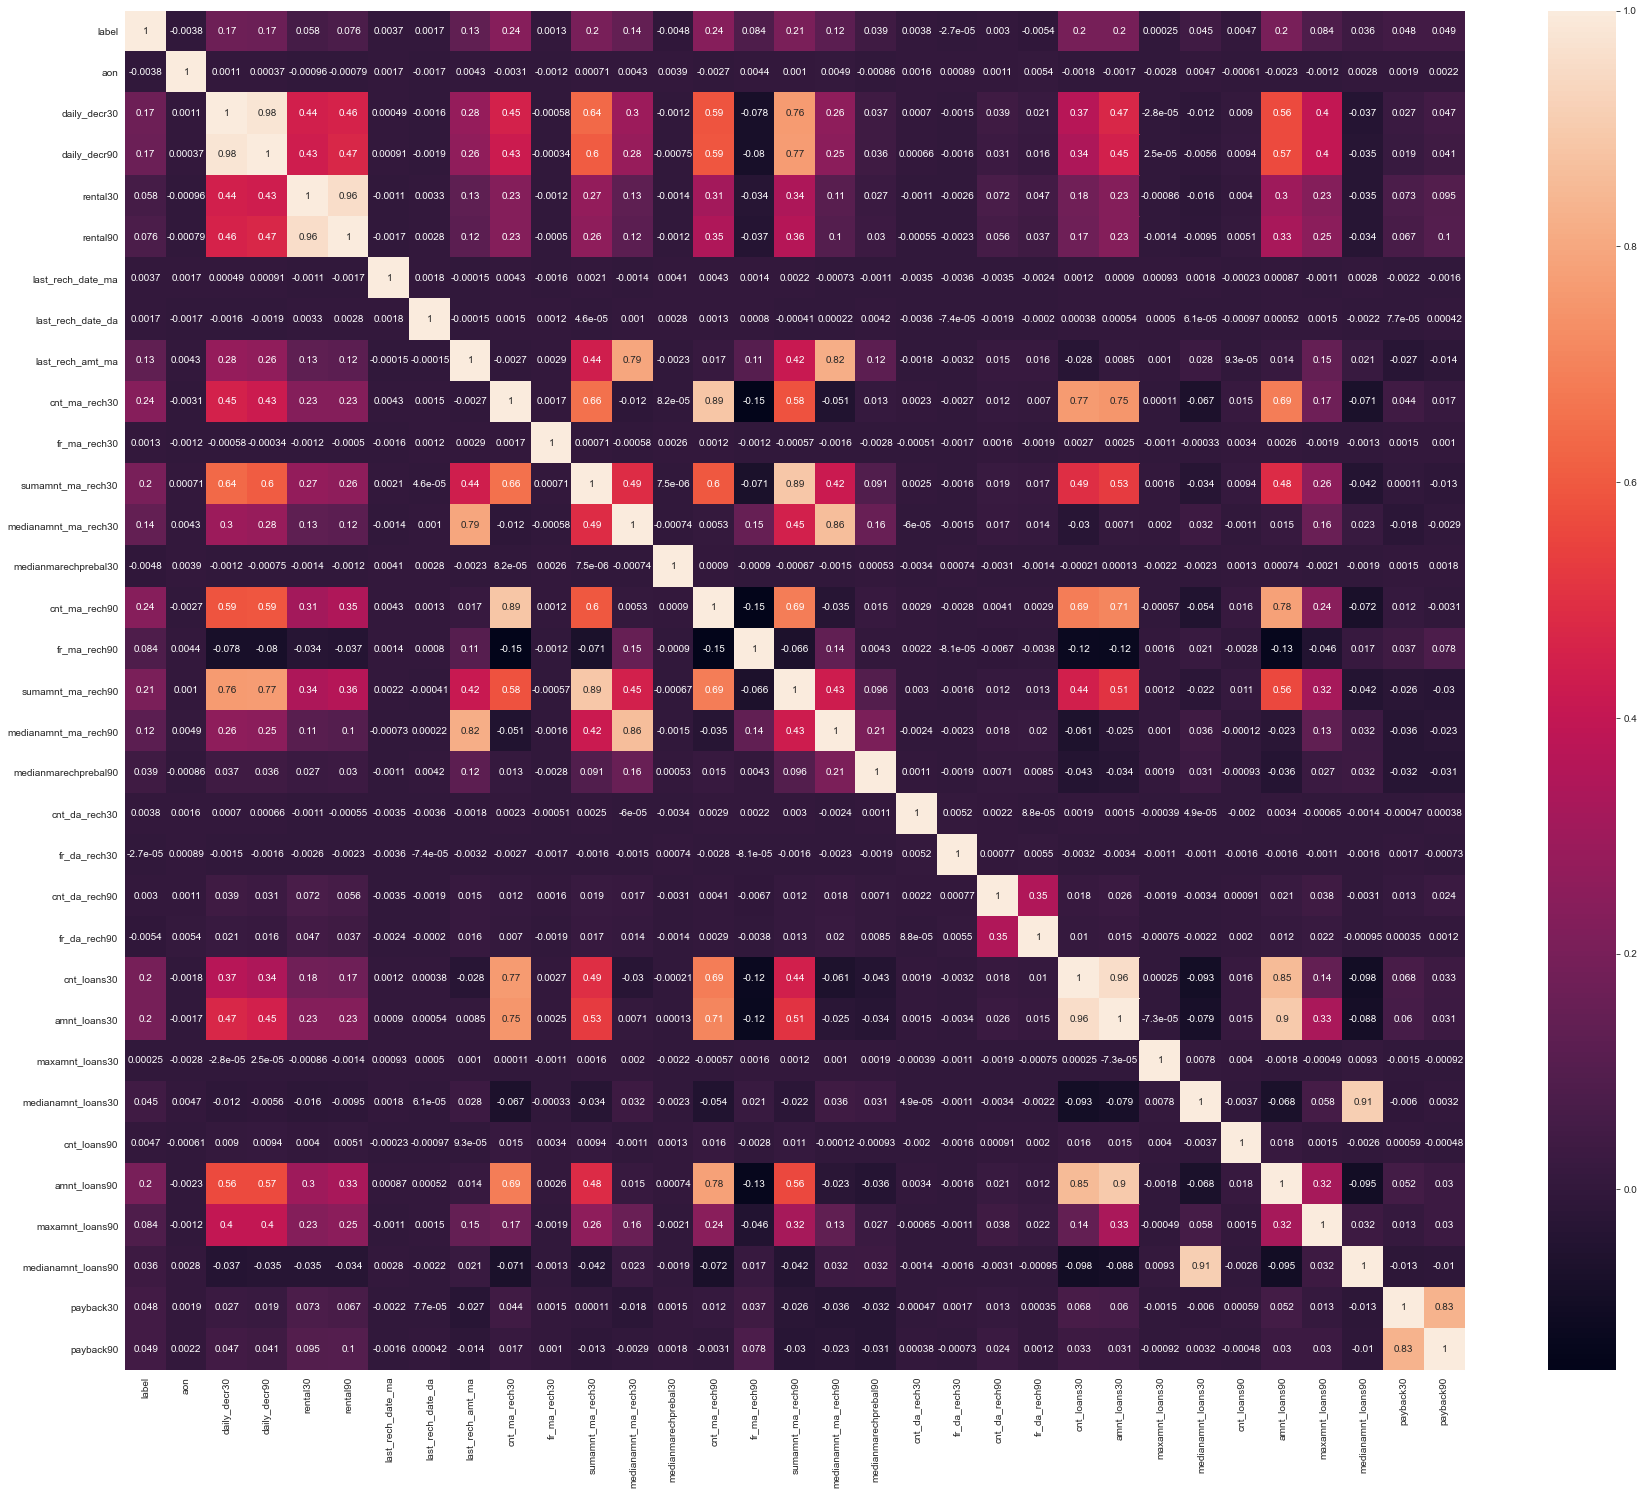

In [21]:
#Visualization of Correlation
#usind Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,25))
sns.heatmap((cor),annot=True)


Text(0.5, 1.0, 'correlation with Target Variable')

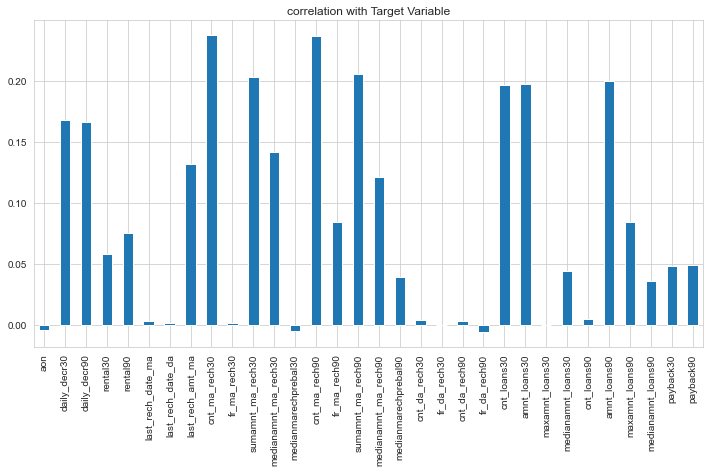

In [22]:
#correlation with Target
plt.figure(figsize=(12,6))
df.drop("label",axis=1).corrwith(df["label"]).plot(kind="bar",grid=True)
plt.xticks(rotation="vertical")
plt.title("correlation with Target Variable")


## Observation
from the above result it is clear that some columns making positive correlation while some has negative correlation to the target variable 

columns making positive correlation

- daily_decr30

- daily_decr90
- rental30
- rental90
- last_rech_date_ma
- last_rech_date_da
- last_rech_amt_ma
- cnt_ma_rech30
- fr_ma_rech30
- sumamnt_ma_rech30
- medianamnt_ma_rech30

- cnt_ma_rech90
- fr_ma_rech90
- sumamnt_ma_rech90
- medianamnt_ma_rech90
- medianmarechprebal90
- cnt_da_rech30

- cnt_da_rech90
- fr_da_rech90
- cnt_loans30
- amnt_loans30
- maxamnt_loans30
- medianamnt_loans30
- cnt_loans90
- amnt_loans90
- maxamnt_loans90
- medianamnt_loans90
- payback30
- payback90
- pcircle
- pdate


columns making negative correlation

- aon

- medianmarechprebal30

- fr_da_rech30

from the observation we can say that the columns which are negatively correlated to the target is not going to help much in our prediction so droping of these columns is recommended 


In [4]:
#Dropping columns not correlated to our target
df.drop(columns=["aon","medianmarechprebal30","fr_da_rech30"],inplace=True)

# Data Cleaning

We will start the process of finding outliers by running the summary statistics on the variables. This is done using the **describe ()** function below, which provides a statistical summary of all the quantitative variables. 

In [24]:
df.describe()

,label,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


###### key observation
    1)There are no missing values
    
    2)Here we find that the mean is higher than median in most of the columns

If the mean is higher than the median, the distribution is positively skewed.

    2)the maximum and the 75% had a wide range of difference than it have to be in normal circumstances

 we infer that we may have large outliers and skewness in some of the attributes 


# Finding Outliers

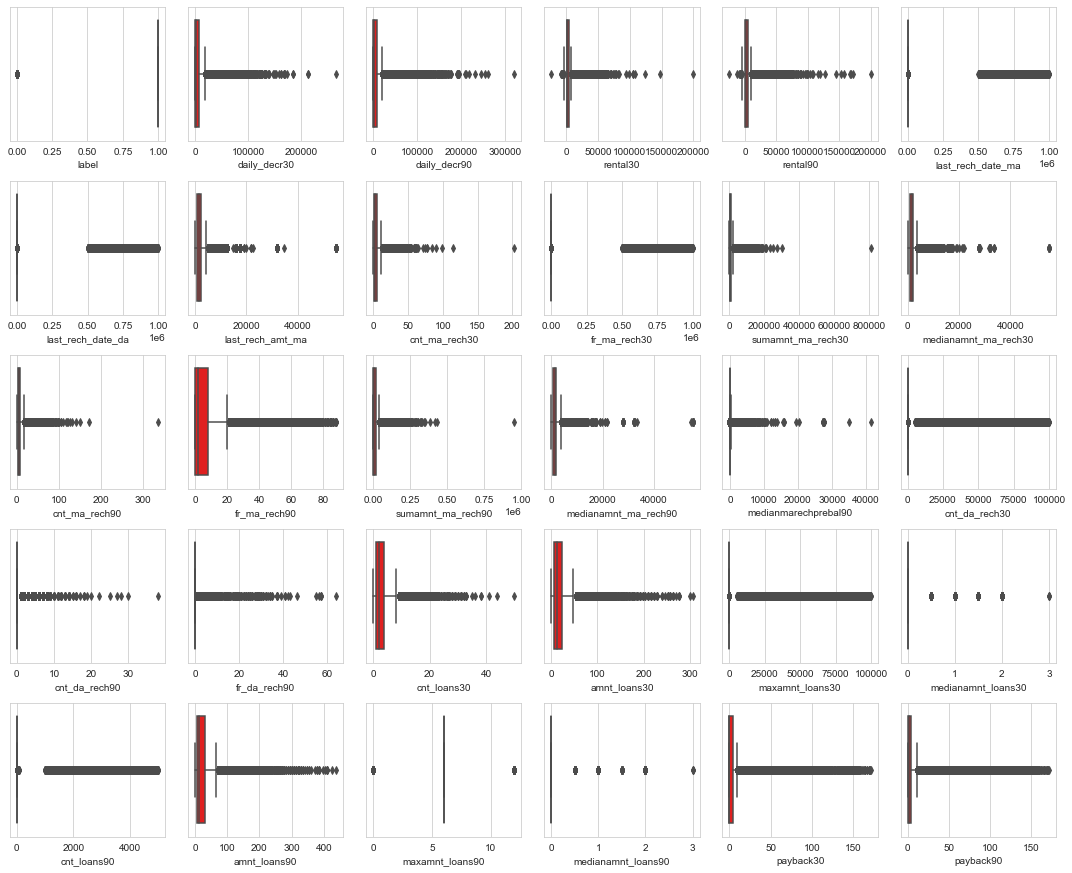

In [25]:
#Plotting Outliers
collist=df.columns.values
ncol=6
nrow=15
plt.figure(figsize=(nrow,6*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color="red",orient="v")
    plt.tight_layout()   

###### Plot insight

    the boxplot shows that there are huge amount of outliers in most of the colummn attributes

# Treating Outliers

In [26]:
#Removing Outliers
#Z-score Techinique
from scipy.stats import zscore
z=np.abs(zscore(df))
z


array([[2.64789583, 0.25229941, 0.27634619, ..., 0.22959366, 2.9046997 ,
        2.39409346],
       [0.37765836, 0.73103667, 0.5533797 , ..., 0.22959366, 0.38562959,
        0.41923266],
       [0.37765836, 0.43201111, 0.42903256, ..., 0.22959366, 0.38562959,
        0.41923266],
       ...,
       [0.37765836, 0.70079045, 0.53319431, ..., 0.22959366, 0.06820893,
        0.04735622],
       [0.37765836, 0.77075515, 0.59455827, ..., 0.22959366, 0.38562959,
        0.59938541],
       [0.37765836, 0.09674426, 0.14174607, ..., 0.22959366, 0.38562959,
        0.41923266]])

In [27]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([13, 13, 29, ..., 25, 23, 27], dtype=int64))


In [28]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(164713, 30)

In [29]:
df.shape

(209593, 30)

## Percentage Loss

In [30]:
loss_of_data=(209593-164713)/209593*100
loss_of_data

21.41292886689918

###### Outliers Overview
when we try to remove outliers it will results in loss of data around 22%. so it is not best practice to remove ouliers with high percentage loss of data.  

From the document Provided we know that data is expensive and we cannot lose more than 7-8% of the data. 

so proceeding without outlier removal

# Seperating Target Variable


In [5]:
x_l=df.drop(["label"],axis=1)
y=df["label"]

In [6]:
x_l.head()

,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [7]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [8]:
# Algorithms requires all features to be on common scale. 
#using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_l)
x=sc.transform(x_l)
x=pd.DataFrame(x,columns=x_l.columns)


In [9]:
x

,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,-0.252299,-0.276346,-0.573844,-0.558583,-0.069637,-0.069550,-0.221637,-0.464760,-0.069279,-0.456281,...,-0.297116,-0.342470,-0.063284,-0.247794,-0.073493,-0.439950,-0.334212,-0.229594,2.904700,2.394093
1,0.731037,0.553380,0.231788,0.036020,-0.069303,-0.069550,1.570178,-0.699718,-0.069670,-0.189110,...,-0.688582,-0.342470,-0.061871,-0.247794,-0.077941,-0.439950,2.517690,-0.229594,-0.385630,-0.419233
2,-0.432011,-0.429033,-0.416020,-0.447674,-0.069619,-0.069550,-0.221637,-0.699718,-0.069670,-0.608062,...,-0.688582,-0.687700,-0.063284,-0.247794,-0.077941,-0.666624,-0.334212,-0.229594,-0.385630,-0.419233
3,-0.581326,-0.555125,-0.587935,-0.576036,-0.068914,-0.069550,-0.471344,-0.934677,-0.069670,-0.759843,...,-0.297116,-0.342470,-0.063284,-0.247794,-0.073493,-0.439950,-0.334212,-0.229594,-0.385630,-0.419233
4,-0.567293,-0.543274,-0.369886,-0.413227,-0.069600,-0.069550,0.103151,0.710030,-0.069633,1.215482,...,1.660218,1.383682,-0.063284,-0.247794,-0.051250,0.693417,-0.334212,-0.229594,-0.120890,-0.192873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.567157,-0.543159,-0.372140,-0.414910,-0.069656,-0.069550,0.836664,-0.229802,-0.069633,0.266233,...,-0.297116,-0.342470,-0.063284,-0.247794,-0.073493,-0.439950,-0.334212,-0.229594,-0.272170,-0.322221
209589,-0.579622,-0.553686,-0.223791,-0.304144,-0.069600,-0.069550,-0.544737,0.005156,-0.069652,-0.454900,...,0.094351,0.002761,-0.063284,-0.247794,-0.069044,-0.213277,-0.334212,-0.229594,-0.272170,-0.322221
209590,0.700790,0.533194,0.735567,0.937500,-0.069619,-0.069550,-0.221637,0.240114,-0.069521,0.160706,...,0.485818,1.383682,-0.061871,-0.247794,-0.055699,1.146764,2.517690,-0.229594,0.068209,-0.047356
209591,0.770755,0.594558,-0.529352,-0.433039,-0.069637,-0.068838,-0.544737,0.240114,-0.069596,0.438824,...,-0.297116,0.002761,-0.061871,-0.247794,-0.069044,0.013396,2.517690,-0.229594,-0.385630,0.599385


In [10]:
#importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [12]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((146715, 29), (62878, 29), (146715,), (62878,))

# Finding Best models



In [13]:
#importing our model library
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.svm import SVC
svc=SVC()


# using for loop to predict accuracy

In [14]:
model=[lr,knn,dt,svc]
for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    print("the score of ",m,"is")
    print("training accuracy score  :",accuracy_score(y_train,pred_train)*100)
    print("testing accuracy score  :",accuracy_score(y_test,pred_test)*100)
    print("*********************************************************************")
    print("\n\n")
    

the score of  LogisticRegression() is
training accuracy score  : 87.6652012405003
testing accuracy score  : 87.53777155761952
*********************************************************************



the score of  KNeighborsClassifier() is
training accuracy score  : 91.73431482806802
testing accuracy score  : 89.14087598206049
*********************************************************************



the score of  DecisionTreeClassifier() is
training accuracy score  : 99.72804416726306
testing accuracy score  : 86.771207735615
*********************************************************************



the score of  SVC() is
training accuracy score  : 87.7926592372968
testing accuracy score  : 87.65068863513471
*********************************************************************





## Ensembel Model

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [16]:
model=[rf,gb]
for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    print("the score of ",m,"is")
    print("training accuracy score  :",accuracy_score(y_train,pred_train)*100)
    print("testing accuracy score  :",accuracy_score(y_test,pred_test)*100)
    print("*********************************************************************")
    print("\n\n")
    

the score of  RandomForestClassifier() is
training accuracy score  : 99.72531779300003
testing accuracy score  : 91.23381786952511
*********************************************************************



the score of  GradientBoostingClassifier() is
training accuracy score  : 90.98388031216984
testing accuracy score  : 90.81554756830687
*********************************************************************





# Model Evaluation

In [17]:
#importing 
#classification Report
#confusion_matrix
#f1_score
#roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [18]:
model=[knn,dt,svc,rf,gb]
for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    print("Report of ",m, "is")
    print("confussion matrix \n",confusion_matrix(y_test,pred_test))
    print("classification_report  \n",classification_report(y_test,pred_test))
    print("f1_score\n",f1_score(y_test,pred_test))
    print("roc_auc_score",roc_auc_score(y_test,pred_test))
   


Report of  KNeighborsClassifier() is
confussion matrix 
 [[ 3147  4754]
 [ 2074 52903]]
classification_report  
               precision    recall  f1-score   support

           0       0.60      0.40      0.48      7901
           1       0.92      0.96      0.94     54977

    accuracy                           0.89     62878
   macro avg       0.76      0.68      0.71     62878
weighted avg       0.88      0.89      0.88     62878

f1_score
 0.9393788731644086
roc_auc_score 0.6802895726939482
Report of  DecisionTreeClassifier() is
confussion matrix 
 [[ 3977  3924]
 [ 4352 50625]]
classification_report  
               precision    recall  f1-score   support

           0       0.48      0.50      0.49      7901
           1       0.93      0.92      0.92     54977

    accuracy                           0.87     62878
   macro avg       0.70      0.71      0.71     62878
weighted avg       0.87      0.87      0.87     62878

f1_score
 0.9244380329784708
roc_auc_score 0.71209681483

# Observation

###### From all the above we infer that the "Random Forest Classifier" performs well.

It gives the Best results when compared with other models.

The score of  ***RandomForestClassifier()*** is

**training accuracy score  : 99.72531779300003**
        
**testing accuracy score  : 91.23381786952511**

In [21]:
#Hyper parameter Tuning
#RandomForestClassifier
#using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
parameters={"n_estimators" :[1,10], "random_state": list(range(0,5))}
rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)



{'n_estimators': 10, 'random_state': 2}


In [22]:
#cross validating 
#Random forest classifier
#cross-validating for checking upper/lower cutting
from sklearn.model_selection import cross_val_score
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
accuracy=accuracy_score(y_test,pred_test)
for i in range(2,10):
    cr=cross_val_score(rf,x,y,cv=i)
    cross=cr.mean()
    print("At cv : ",i,"\ncross val score is : ",cross*100,"\naccuracy score is: ",accuracy*100)
    print("******************************************************************************")
    print("\n\n")

        



At cv :  2 
cross val score is :  91.13138353218987 
accuracy score is:  91.17338337733388
******************************************************************************



At cv :  3 
cross val score is :  91.19531693528778 
accuracy score is:  91.17338337733388
******************************************************************************



At cv :  4 
cross val score is :  91.22632937566473 
accuracy score is:  91.17338337733388
******************************************************************************



At cv :  5 
cross val score is :  91.20819894849431 
accuracy score is:  91.17338337733388
******************************************************************************



At cv :  6 
cross val score is :  91.24159663733097 
accuracy score is:  91.17338337733388
******************************************************************************



At cv :  7 
cross val score is :  91.26354459743041 
accuracy score is:  91.17338337733388
********************************************

###### Observation

- The cross validation score and the accuracy score is nearer which shows there is no under or over fitting

# Improved Accuracy

In [28]:
#using RandomForestClassification with best Result
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=2,n_estimators=100,cv=9)
rf.fit(x_train,y_train)
rf_test_pred=rf.predict(x_test)
rf_train_pred=rf.predict(x_train)
rf_test_acc=accuracy_score(y_test,rf_test_pred)
rf_train_acc=accuracy_score(y_train,rf_train_pred)
print("training accuracy : ",rf_train_acc*100)
print("improved testing accuracy : ",rf_test_acc*100)


training accuracy :  99.72668098013155
improved testing accuracy :  91.16543147046661


# Auc_roc_Curve

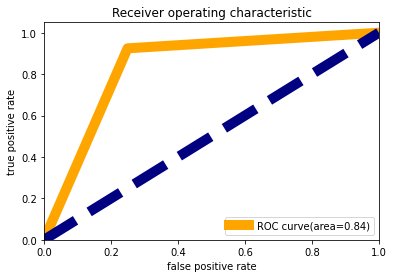

In [29]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(rf_test_pred,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label="ROC curve(area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Saving Model

In [26]:
import pickle
filename="micro_credit.pkl"
pickle.dump(rf,open(filename,"wb"))

# conclusion

In [30]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_con=pd.DataFrame({"original":a,"Predicted":predicted})
df_con.head(10)

,original,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,0,0
7,1,1
8,0,1
9,1,1
